### COVID-19 
### Number of RECOVERED updated by DAY
### in the countries: CHINA, GERMANY, ITALY, KOREA, JAPAN, USA, AUSTRALIA

In [1]:
# Configuration: setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.start import *
from Starts.startml import *
from Starts.startvis import *  
%matplotlib inline
rcParams['figure.figsize'] = 20, 6


C:\Users\Duc-LongPhan\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


Start importing folder
['.gitignore', '01-22-2020.csv', '01-23-2020.csv', '01-24-2020.csv', '01-25-2020.csv', '01-26-2020.csv', '01-27-2020.csv', '01-28-2020.csv', '01-29-2020.csv', '01-30-2020.csv', '01-31-2020.csv', '02-01-2020.csv', '02-02-2020.csv', '02-03-2020.csv', '02-04-2020.csv', '02-05-2020.csv', '02-06-2020.csv', '02-07-2020.csv', '02-08-2020.csv', '02-09-2020.csv', '02-10-2020.csv', '02-11-2020.csv', '02-12-2020.csv', '02-13-2020.csv', '02-14-2020.csv', '02-15-2020.csv', '02-16-2020.csv', '02-17-2020.csv', '02-18-2020.csv', '02-19-2020.csv', '02-20-2020.csv', '02-21-2020.csv', '02-22-2020.csv', '02-23-2020.csv', '02-24-2020.csv', '02-25-2020.csv', '02-26-2020.csv', '02-27-2020.csv', '02-28-2020.csv', '02-29-2020.csv', '03-01-2020.csv', '03-02-2020.csv', '03-03-2020.csv', '03-04-2020.csv', '03-05-2020.csv', '03-06-2020.csv', '03-07-2020.csv', 'README.md']
None
None


### Number of covid-19 outbreak days 

In [2]:
from covid import *
len(data)

46

### Number of RECOVERED in the first outbreak day

In [3]:
sum(data[0]['Recovered'].values)

28.0

### Number of RECOVERED recorded in the latest outbreak day

In [4]:
sum(data[-1]['Recovered'].values)

58359

### Number of RECOVERED in all countries from day 0 to latest day

Text(0, 0.5, 'Recovered cases')

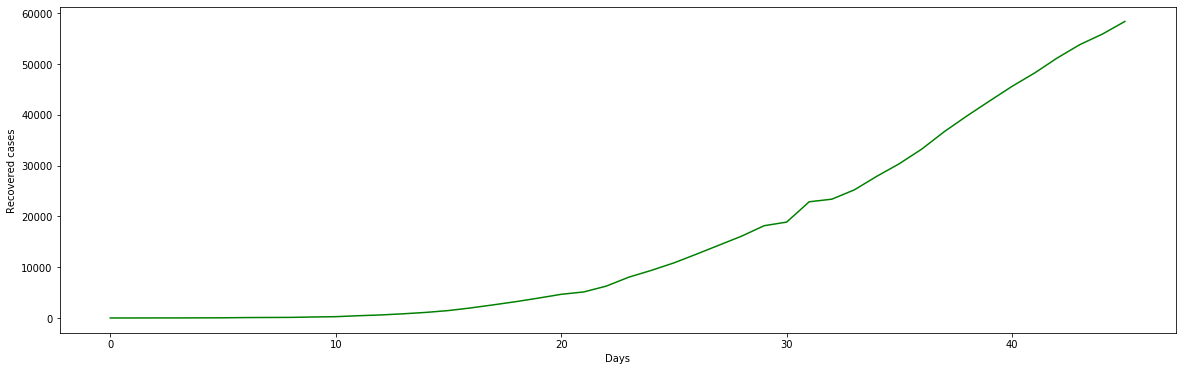

In [5]:
plt.plot(x_dat, y_dat_all_recovered, color='green')
plt.xlabel('Days')
plt.ylabel('Recovered cases')

### Number of RECOVERED in CHINA from day 0 to latest day 

Text(0, 0.5, 'Recovered cases')

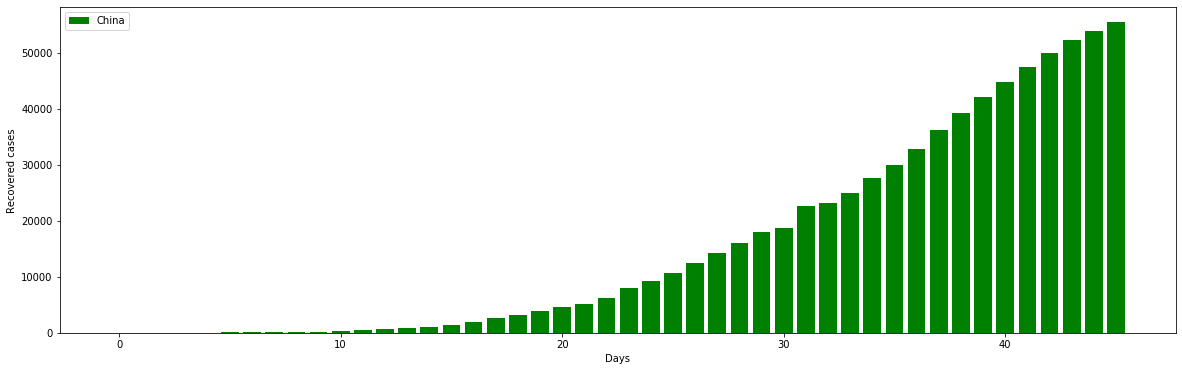

In [6]:
plt.bar(x_dat, y_dat_recovered_cn, color='green')
plt.legend(["China"])

plt.xlabel('Days')
plt.ylabel('Recovered cases')

### Number of RECOVERED in GERMANY from day 0 to latest day 

Text(0, 0.5, 'Recovered cases')

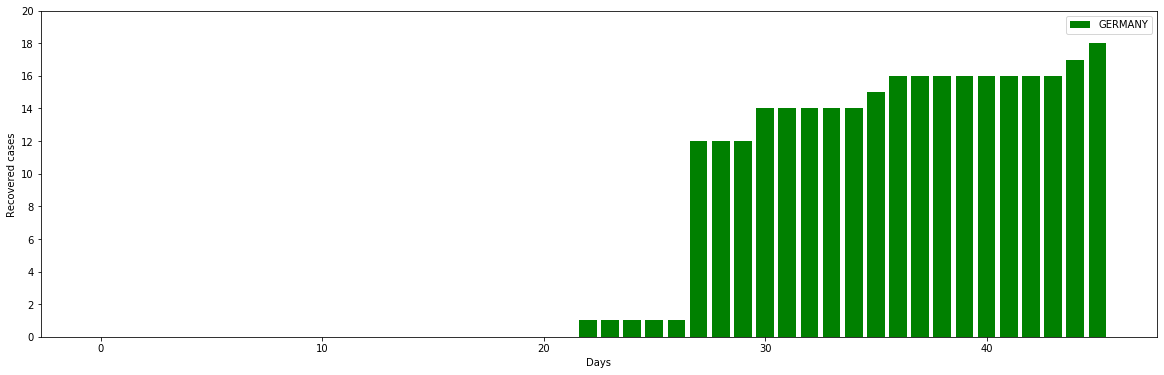

In [13]:
plt.bar(x_dat, y_dat_recovered_de, color='green')
plt.legend(["GERMANY"])

plt.yticks(np.arange(0, max(y_dat_recovered_au)+1, 2))
plt.xlabel('Days')
plt.ylabel('Recovered cases')

### Number of RECOVERED in ITALY from day 0 to latest day

Text(0, 0.5, 'Recovered cases')

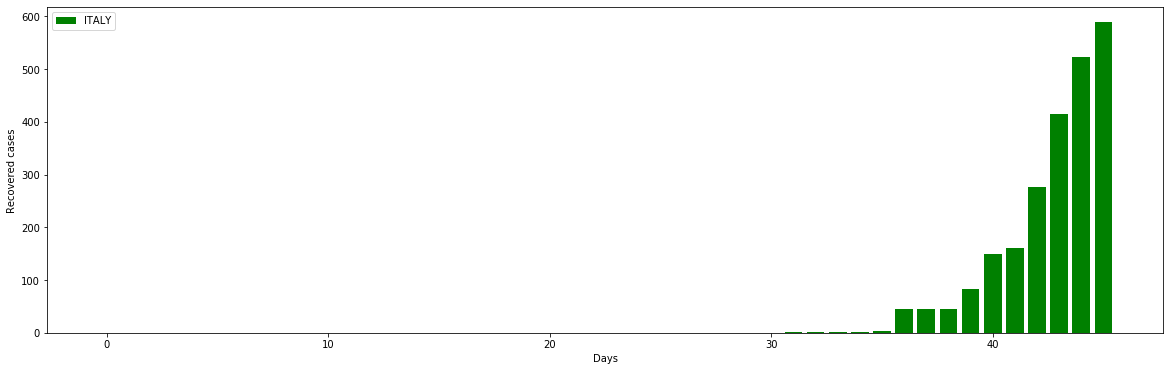

In [8]:
plt.bar(x_dat, y_dat_recovered_it, color='green')
plt.legend(["ITALY"])

plt.xlabel('Days')
plt.ylabel('Recovered cases')

### Number of RECOVERED in SOUTH KOREA from day 0 to latest day 

Text(0, 0.5, 'Recovered cases')

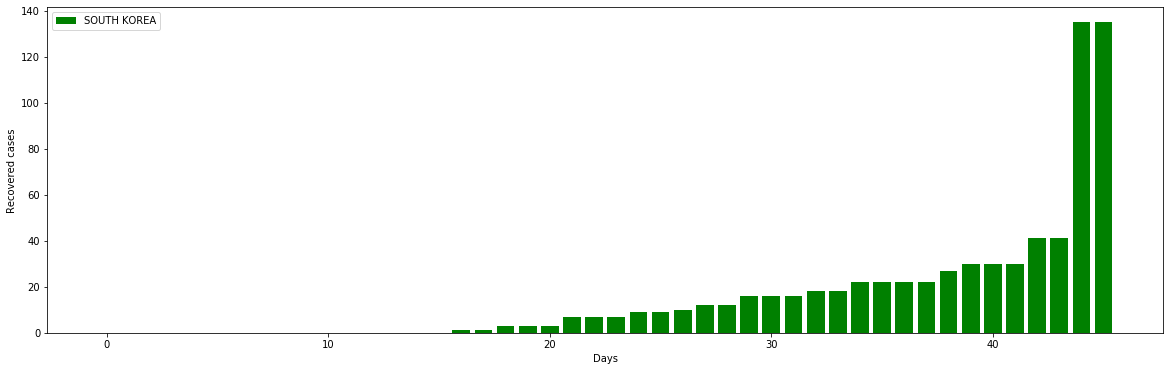

In [9]:
plt.bar(x_dat, y_dat_recovered_kr, color='green')
plt.legend(["SOUTH KOREA"])

plt.xlabel('Days')
plt.ylabel('Recovered cases')

### Number of RECOVERED in JAPAN from day 0 to latest day 

Text(0, 0.5, 'Recovered cases')

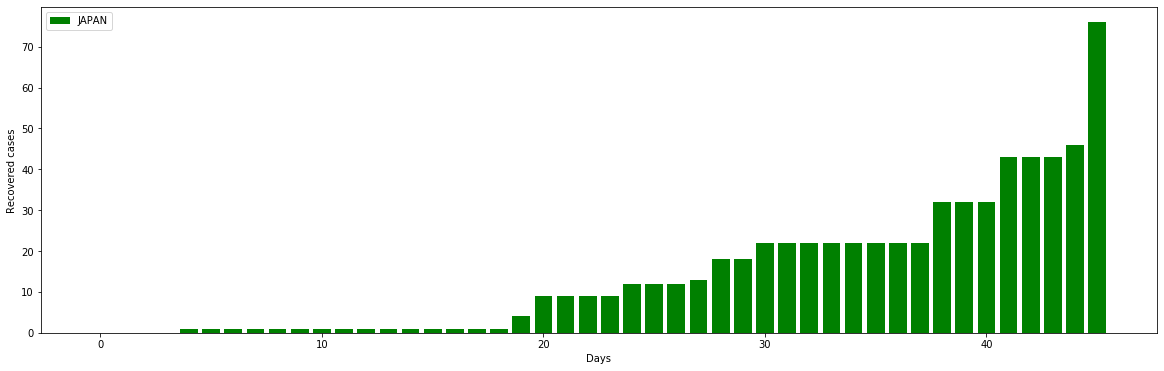

In [10]:
plt.bar(x_dat, y_dat_recovered_jp, color='green')
plt.legend(["JAPAN"])

plt.xlabel('Days')
plt.ylabel('Recovered cases')

### Number of RECOVERED in the USA from day 0 to latest day 

Text(0, 0.5, 'Recovered cases')

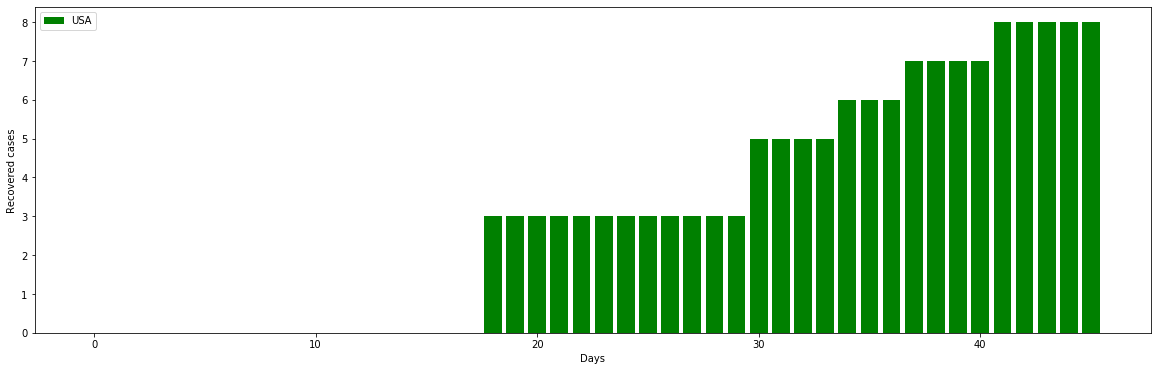

In [11]:
plt.bar(x_dat, y_dat_recovered_us, color='green')
plt.legend(["USA"])

plt.xlabel('Days')
plt.ylabel('Recovered cases')


### Number of RECOVERED in the Australia from day 0 to latest day 

Text(0, 0.5, 'Recovered cases')

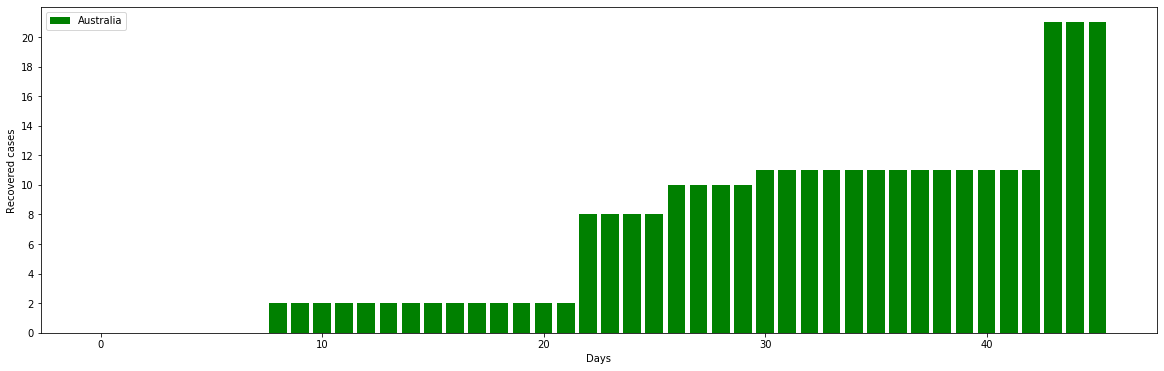

In [12]:
plt.bar(x_dat, y_dat_recovered_au, color='green')
plt.legend(["Australia"])

plt.yticks(np.arange(0, max(y_dat_recovered_au)+1, 2))
plt.xlabel('Days')
plt.ylabel('Recovered cases')
